# 딥러닝 시작하기 


# 7-1 인공신경망


In [20]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [21]:
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- 훈련 데이터는 60000개, 테스트 데이터는 10000개로 구성되어 있다. 각 데이터는 28x28 크기의 흑백 이미지로 이루어져 있다.
- 테스트 세트는 10000개로 구성되어 있다.


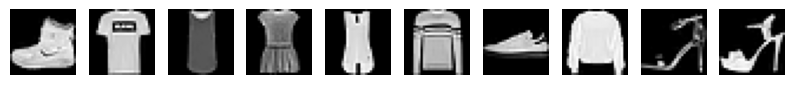

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray')
    axs[i].axis('off')
plt.show()

In [23]:
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


<img src="https://pravarmahajan.github.io/assets/images/fashion-MNIST/labels_table.png" width="500" height="500" />

In [24]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 부류하기

In [25]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [26]:
train_scaled.shape

(60000, 784)

- reshape(-1, 28 * 28) : 28x28 크기의 이미지를 1차원 배열로 변환한다.

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)  # Use 'log_loss' instead of 'log'
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.81945


In [28]:
sc = SGDClassifier(loss='log_loss', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8306333333333333


In [29]:
sc = SGDClassifier(loss='log_loss', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))


0.84375


- 반복 횟수를 늘더라도 정확도가 크게 향상되지 않는다.

## 인공신경망

In [30]:
from tensorflow import keras

### 인공신경망 모델 만들기

In [31]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [32]:
train_scaled.shape, val_scaled.shape, train_target.shape, val_target.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [33]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

D:\Python\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Dense : 완전 연결층(fully connected layer)을 정의하는 클래스이다.
- activation : 활성화 함수(activation function)를 지정한다. softmax는 다중 클래스 분류에 사용된다.
- input_shape : 입력 데이터의 형태를 지정한다. 여기서는 28x28 크기의 이미지를 1차원 배열로 변환한 784 차원의 벡터로 지정한다.
- Dense(10) : 10개의 뉴런을 가진 완전 연결층을 생성한다. 이는 10개의 클래스를 분류하기 위한 것이다.
- input_shape=(784,) : 입력 데이터의 형태를 지정한다. 여기서는 28x28 크기의 이미지를 1차원 배열로 변환한 784 차원의 벡터로 지정한다.
- activation='softmax' : 출력층에서 소프트맥스 함수를 사용하여 각 클래스에 대한 확률을 계산한다.

In [43]:
# 모델 생성
# model = keras.Sequential(dense)

### 인공 신경망으로 아이템 분류하기 

In [42]:
# model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [45]:
from tensorflow import keras

# Define the input layer
input_layer = keras.layers.Input(shape=(784,))

# Add the dense layer
dense_layer = keras.layers.Dense(10, activation='softmax')

# Create the model
model = keras.Sequential([input_layer, dense_layer])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [47]:

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.7385 - loss: 0.7746
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.8398 - loss: 0.4754
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.8437 - loss: 0.4491
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8485 - loss: 0.4416
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.8553 - loss: 0.4245


In [48]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.8513 - loss: 0.4285


[0.4355801045894623, 0.8511666655540466]

### 인공 신경망 모델로 성능 향상

## 심층 신경망

In [49]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [50]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [51]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [52]:
model = keras.Sequential([dense1, dense2])

In [53]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<img src="https://velog.velcdn.com/images/simon919/post/48fbc91e-edd2-4d10-acff-684f670dff83/image.png">

In [54]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='fashion_mnist_model')

In [58]:
model.summary()

Model: "fashion_mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))


In [60]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7519 - loss: 0.7692
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8491 - loss: 0.4195
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8596 - loss: 0.3866
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 0.3579
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8773 - loss: 0.3376


## 렐루 함수

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),  # Define input shape here
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

In [66]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [69]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7650 - loss: 0.6793
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8497 - loss: 0.4209
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8690 - loss: 0.3612
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8797 - loss: 0.3344
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8847 - loss: 0.3140


In [70]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8794 - loss: 0.3526  


[0.35539770126342773, 0.8772500157356262]

## 옵티마이저 - optimizer

In [71]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [74]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [75]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7681 - loss: 0.6813
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8562 - loss: 0.4127
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8725 - loss: 0.3463
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8805 - loss: 0.3251
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8881 - loss: 0.3040


In [80]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8818 - loss: 0.3288  


[0.3333633244037628, 0.8804166913032532]